In [4]:
import pandas as pd 
import numpy as np

In [5]:
df = pd.read_csv(r"C:\weather\reviews.csv")

In [6]:
df.head(20)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,09-07-2022 15:00,"Great music service, the audio is high quality...",5,2,NaN
1,09-07-2022 14:21,Please ignore previous negative rating. This a...,5,1,NaN
2,09-07-2022 13:27,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,09-07-2022 13:26,Really buggy and terrible to use as of recently,1,1,NaN
4,09-07-2022 13:20,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
5,09-07-2022 13:20,The player controls sometimes disappear for no...,3,7,NaN
6,09-07-2022 13:19,I love the selection and the lyrics are provid...,5,0,NaN
7,09-07-2022 13:17,Still extremely slow when changing storage to ...,3,16,NaN
8,09-07-2022 13:16,It's a great app and the best mp3 music app I ...,5,0,NaN
9,09-07-2022 13:11,"I'm deleting this app, for the following reaso...",1,318,NaN


In [7]:
review_df = df[['Review','Rating']]

print(review_df.shape)
review_df.head(5)

(61594, 2)


,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [8]:
df.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [9]:
review_df = review_df[review_df['Rating'] != '0']

print(review_df.shape)
review_df.head(5)

(61594, 2)


,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [28]:
review_df.Rating.value_counts()

5    22095
1    17653
4     7842
2     7118
3     6886
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

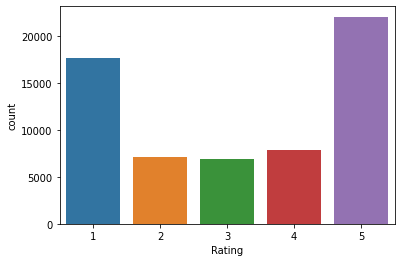

In [29]:
import seaborn as sns
sns.countplot(data = df, x = "Rating")

In [30]:
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [31]:
score_1 = reviews[reviews['Rating'] == 1]
score_2 = reviews[reviews['Rating'] == 2]
score_3 = reviews[reviews['Rating'] == 3]
score_4 = reviews[reviews['Rating'] == 4]
score_5 = reviews[reviews['Rating'] == 5]

In [32]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

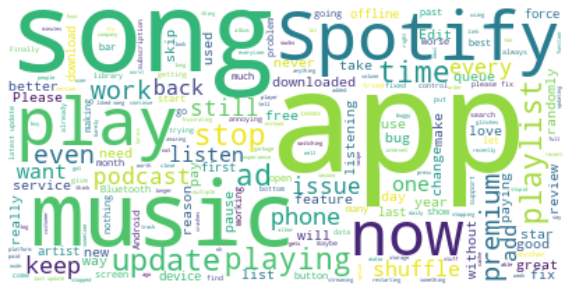

In [34]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Rating'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Review.str.cat()
positive_reviews_str = positive_reviews.Review.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Scores')

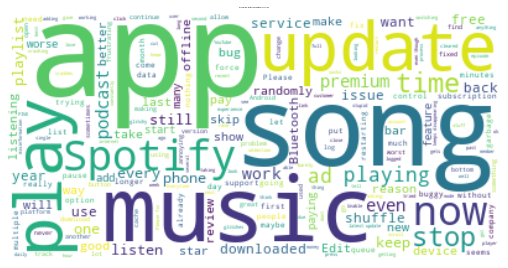

In [36]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=2)

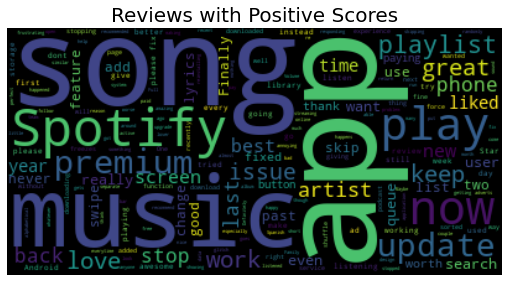

In [37]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [38]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 125.6 kB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [41]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Review']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.078,0.791,0.131,0.7430
1,0.140,0.627,0.233,0.6884
2,0.000,1.000,0.000,0.0000
3,0.050,0.875,0.076,0.2263
4,0.178,0.777,0.045,-0.7446


In [42]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,neg,neu,pos,compound
0,09-07-2022 09:50,"Great song selection, amazing audio quality. H...",3,8,"Hey, thanks for the feedback! We'd love to hel...",0.078,0.791,0.131,0.7430
1,08-07-2022 01:51,Seems like the random stopping of music has be...,4,4,"Hey, thanks for the report. If you haven't tri...",0.140,0.627,0.233,0.6884
2,07-07-2022 03:39,They would add their songs to MY PLAYLIST! I c...,1,1,"Hey, thanks for the feedback! You can always a...",0.000,1.000,0.000,0.0000


In [43]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,neg,neu,pos,compound,Sentiment
0,09-07-2022 09:50,"Great song selection, amazing audio quality. H...",3,8,"Hey, thanks for the feedback! We'd love to hel...",0.078,0.791,0.131,0.7430,Positive
1,08-07-2022 01:51,Seems like the random stopping of music has be...,4,4,"Hey, thanks for the report. If you haven't tri...",0.140,0.627,0.233,0.6884,Positive
2,07-07-2022 03:39,They would add their songs to MY PLAYLIST! I c...,1,1,"Hey, thanks for the feedback! You can always a...",0.000,1.000,0.000,0.0000,Positive
3,06-07-2022 20:16,I paid last month for Premium Family & my wife...,5,0,Hi James! We’re sorry to hear that. We’d love ...,0.050,0.875,0.076,0.2263,Positive
4,06-07-2022 00:59,I really don't care about the random pauses in...,3,0,"Hi again. If you haven't tried Premium yet, we...",0.178,0.777,0.045,-0.7446,Negative


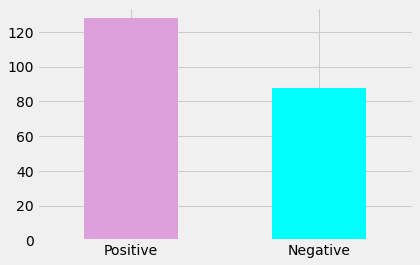

In [44]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

In [11]:
sentiment_label = review_df.Rating.factorize()
sentiment_label

(array([0, 0, 1, ..., 4, 4, 1], dtype=int64),
 Int64Index([5, 4, 1, 3, 2], dtype='int64'))

In [12]:
Emotion = review_df.Review.values

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(Emotion)

In [14]:
encoded_docs = tokenizer.texts_to_sequences(Emotion)

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
vocab_size = len(Emotion)
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1971008   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,987,659
Trainable params: 1,987,659
Non-trainable params: 0
______________________________________________

In [17]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
1540/1540 [==============================] - 228s 146ms/step - loss: -23.0704 - accuracy: 0.1254 - val_loss: -37.8751 - val_accuracy: 0.1354
Epoch 2/20
1540/1540 [==============================] - 233s 151ms/step - loss: -58.6635 - accuracy: 0.1253 - val_loss: -70.1484 - val_accuracy: 0.1354
Epoch 3/20
1540/1540 [==============================] - 231s 150ms/step - loss: -93.7174 - accuracy: 0.1253 - val_loss: -103.1103 - val_accuracy: 0.1354
Epoch 4/20
1540/1540 [==============================] - 230s 150ms/step - loss: -183.7239 - accuracy: 0.2830 - val_loss: -202.3756 - val_accuracy: 0.2890
Epoch 5/20
1540/1540 [==============================] - 229s 149ms/step - loss: -251.0861 - accuracy: 0.3084 - val_loss: -264.0374 - val_accuracy: 0.3035
Epoch 6/20
1540/1540 [==============================] - 227s 148ms/step - loss: -316.8080 - accuracy: 0.3133 - val_loss: -320.5545 - val_accuracy: 0.3097
Epoch 7/20
1540/1540 [==============================] - 228s 148ms/step - loss: -

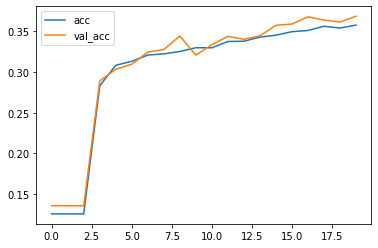

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
 
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

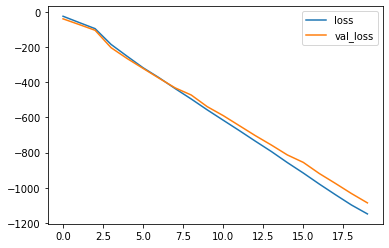

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")